# Project description
Beta Bank's customers are leaving, each month, bit by bit. Bankers discovered that it is cheaper to save existing customers than to attract new ones.

We need to predict whether a customer will leave the bank soon. You have the data on past customer behavior and termination of contracts with the bank.

Create a model with the maximum possible F1 value. To pass the check, you need an F1 value of at least 0.59. Check F1 for the test set. 

In addition, you should measure the AUC-ROC metric and compare it to the F1 value.

Translated with DeepL.com (free version)

## Analysis
To starto with our analysis we always want to collect the data and have it available, to then process it into a usable and usefull dataset.

### Preprocessing

In [251]:
# We always start by importing all our libraries to use in this project
# Pandas for dataset management
import pandas as pd
# Sklearn for machine learning practices and modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Plotly for showing the data in dynamic graphics
import matplotlib.pyplot as plt
# Numpy for specific numeric operations
import numpy as np

In [252]:
# We proceed to get our dataset on out notebook
df = pd.read_csv('./beta_bank.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [253]:
# Now that we have seen our Dataframe we should inspect it
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [254]:
# After watching the previous result we can start investigating the values
# Making sure we do no't have duplicates
print(df.duplicated(subset=['CustomerId']).value_counts())
# Find all nulls on the dataframe
print("Nulls on Data Frame: ",len(df[df.isna().any(axis=1)]))

False    10000
Name: count, dtype: int64
Nulls on Data Frame:  909


Watching the number of null values on the "Tenure" column is 909, we will proceed by eliminating this rows to get only the ones that have all the values with their correct type.

In [255]:
# Eliminates all the rows with Nans on the dataframe
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   float64
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.0+ MB


Also looking at "Tenure" column, it seems like there are no real floats on the type float column, so we proceed to test and transform our column into an integer column if there are no real floats inside it.

In [256]:
if (np.array_equal(df['Tenure'], df['Tenure'].astype('int64'))):
    print("Tenure Column it's compatible for integer transformation")
    df['Tenure'] = df['Tenure'].astype('int64')
    print("Transformed")
    print()
    df.info()
else:
    print("Tenure Column it's not compatible with integer transformation")

Tenure Column it's compatible for integer transformation
Transformed

<class 'pandas.core.frame.DataFrame'>
Index: 9091 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        9091 non-null   int64  
 1   CustomerId       9091 non-null   int64  
 2   Surname          9091 non-null   object 
 3   CreditScore      9091 non-null   int64  
 4   Geography        9091 non-null   object 
 5   Gender           9091 non-null   object 
 6   Age              9091 non-null   int64  
 7   Tenure           9091 non-null   int64  
 8   Balance          9091 non-null   float64
 9   NumOfProducts    9091 non-null   int64  
 10  HasCrCard        9091 non-null   int64  
 11  IsActiveMember   9091 non-null   int64  
 12  EstimatedSalary  9091 non-null   float64
 13  Exited           9091 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.0+ MB


We also need to set gender profiles as One Hot Enconding to be more precise on behaviours

In [257]:
# Create a dictionary to reeplace de key for the value
gender_dict = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_dict)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,France,1,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,1,36,7,0.00,1,0,1,42085.58,1


We do the same thing for Geography since we have only 3 countries listed

In [258]:
geography_dict = {'France': 0, 'Germany': 1, 'Spain':2}
df['Geography'] = df['Geography'].map(geography_dict)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15719294,Wood,800,0,1,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,1,36,7,0.00,1,0,1,42085.58,1


For future purposes we will implement a function that will retrieve us all the metrics we need using only the target_valid and predicted_valid values

In [259]:
def stats(target_valid, predicted_valid, depth=0):
    ac = accuracy_score(target_valid,predicted_valid)
    re = recall_score(target_valid,predicted_valid)
    pr = precision_score(target_valid,predicted_valid)
    f1= f1_score(target_valid,predicted_valid)
    df_metrics = pd.DataFrame({'Depth':depth, 'Accuracy':[ac], 'Recall':[re],'Precision':[pr],'F1':[f1]}).set_index("Depth")
    df_metrics = df_metrics*100
    print(df_metrics.round(2))

Moving forward we will analyze what would happen if we would train a model withouth balancing our classes

In [260]:
# First we will set our target and features to train our model
target = df['Exited']
features = df.drop(['Exited', 'Surname'], axis=1)
# Then we partition out data for train and test values
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
# Intance model
model = DecisionTreeClassifier(random_state=12345)
# Train the model with train data
model.fit(features_train, target_train)
# Predict over the test data
predicted_valid = model.predict(features_valid)
stats(target_valid,predicted_valid)


       Accuracy  Recall  Precision     F1
Depth                                    
0         78.09   51.66      45.42  48.34


Metrics shown on the previous model shows us that our model is capable to identify 48% of the times people who have leave and people who stayed. This despite being a good score, needs to be refined by other methods to get a high percentage of the predictions.

### Classes
To proceed, lets start analyzing our OHE class, and see if there is balance on the examples we have.

In [261]:
# We would need to identify how many people have left and how many are still on the service
# We create a series where we have only the 0s and only 1s
not_exited_df = df[df['Exited'] == 0]
exited_df = df[df['Exited'] == 1]
print("People that have not exited the service: ",len(not_exited_df))
print("People that have exited the service: ",len(exited_df))

People that have not exited the service:  7237
People that have exited the service:  1854


Looking at the previous results we need to have a balanced dataset to work with, in order to do this, we need to be more certain on what did the people who exited the service had in common. In order to do that we will undersample the people that have not exited the service to the same number as the ones that have already exited.

## Undersampling and Oversampling

First we would want to set our feature and target data to have clear what are we going to consider further on this analisis. And also split our test and train data for the analysis.

In [262]:
# We choose "exited" as our target to get conclusions on why people are exiting
target = df['Exited']
# And features everything else
features = df.drop(['Exited','Surname'], axis=1)
# Then we partition out data for train and test values
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)

For undersamplig our data, we created a method that allows us to reduce our dataset to a fraction of what it is now on an specific feature, in this case the "Exited" Column

In [263]:
def downsample(features, target, fraction):
		# Separate negative and positives
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
		# Sample down to (fraction)% of positives, which are the dominant values in this case
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)]
        + [features_ones]
    )
    # Sample down positives also here
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)]
        + [target_ones]
    )
		# Shuffle the values so the are not in order
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345
    )
		# return
    return features_downsampled, target_downsampled


In [264]:
# We proceed to use the downsample function on our train data
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
# Show number of exited and not exited
target_downsampled.value_counts()

Exited
1    1403
0    1354
Name: count, dtype: int64

For oversampling we will do the same but instead off reducing the clients on 0 status on the "Exited" column, we will increase the samples of the clients who has 1 on ther exited column

In [265]:
# Oversampling function
def upsample(features, target, repeat):
	  # Splits negatives and positives (1 y 0)
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
		# Repeats the content times the value of repeat to increase the df data
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
		# Shuffles the df data
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
		# Return the data upsampled
    return features_upsampled, target_upsampled

In [266]:
# Use the funciton with the data given
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)

target_upsampled.value_counts()

Exited
1    5612
0    5415
Name: count, dtype: int64

Now that we have our dataset balanced in classes we can proceed to train our models and see if there is an improvement

### DecisionTreeClassifier

In [267]:
# Declare our down sampled model
ds_model = DecisionTreeClassifier(random_state=12345)
# Train the model with downsampled data
ds_model.fit(features_downsampled,target_downsampled)
# Predict the values
predicted_ds_valid = ds_model.predict(features_valid)

stats(target_valid, predicted_ds_valid)

       Accuracy  Recall  Precision     F1
Depth                                    
0         66.52   72.51      33.92  46.22


In [268]:
# Declare our up sampled model
us_model = DecisionTreeClassifier(random_state=12345)
# Train the model with downsampled data
us_model.fit(features_upsampled,target_upsampled)
# Predict the values
predicted_us_valid = ds_model.predict(features_valid)

stats(target_valid, predicted_us_valid)

       Accuracy  Recall  Precision     F1
Depth                                    
0         66.52   72.51      33.92  46.22


### RandomForestClassifier

In [269]:
# Undersampling
for depth in range(1, 11, 1):
    ds_forest = RandomForestClassifier(n_estimators=30,random_state=12345, max_depth=depth)
    ds_forest.fit(features_downsampled, target_downsampled)
    ds_forest_predicted = ds_forest.predict(features_valid)
    stats(target_valid, ds_forest_predicted,depth=depth)


       Accuracy  Recall  Precision     F1
Depth                                    
1         72.72    69.4      39.37  50.24
       Accuracy  Recall  Precision     F1
Depth                                    
2         72.77   77.16      40.28  52.93
       Accuracy  Recall  Precision     F1
Depth                                    
3         77.83   73.61       46.3  56.85
       Accuracy  Recall  Precision     F1
Depth                                    
4         76.33   77.38      44.46  56.47
       Accuracy  Recall  Precision    F1
Depth                                   
5         77.47    76.5      45.94  57.4
       Accuracy  Recall  Precision     F1
Depth                                    
6         77.17   77.38      45.56  57.35
       Accuracy  Recall  Precision     F1
Depth                                    
7         77.08   74.94      45.31  56.47
       Accuracy  Recall  Precision     F1
Depth                                    
8         78.18   77.16      46.96  5

Looking at the results of undersampling technique, it seems that we almost reached the goal, but was short for 1.65 points on the f1 score, lets try it with Upsampling next.

In [270]:
# Upsampling
for depth in range(1, 15, 1):
    us_forest = RandomForestClassifier(n_estimators=30, random_state=12345, max_depth=depth)
    us_forest.fit(features_upsampled, target_upsampled)
    us_forest_predicted = us_forest.predict(features_valid)
    stats(target_valid, us_forest_predicted,depth=depth)

       Accuracy  Recall  Precision     F1
Depth                                    
1         71.36    71.4      38.15  49.73
       Accuracy  Recall  Precision     F1
Depth                                    
2          74.0   76.27      41.55  53.79
       Accuracy  Recall  Precision     F1
Depth                                    
3         77.78   75.17      46.31  57.31
       Accuracy  Recall  Precision     F1
Depth                                    
4         77.47   72.06      45.71  55.94
       Accuracy  Recall  Precision     F1
Depth                                    
5         77.17   78.05       45.6  57.56
       Accuracy  Recall  Precision     F1
Depth                                    
6          78.0   74.94      46.62  57.48
       Accuracy  Recall  Precision     F1
Depth                                    
7         78.35   72.73      47.06  57.14
       Accuracy  Recall  Precision     F1
Depth                                    
8         79.94   73.61      49.63

Analysing our iterations between all forests, we have the certainty that the best depth to train our model on this ocassion is on **depth 10** , getting a score of 60.04% on the f1 score.

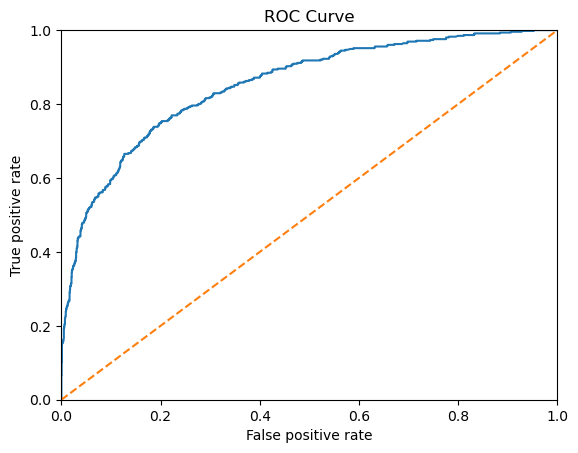

In [ ]:
auc_forest = RandomForestClassifier(n_estimators=30, random_state=12345, max_depth=depth)
auc_forest.fit(features_upsampled, target_upsampled)
probabilities_valid = auc_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
# fpr false positive values, tpr true positive values
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
# Creates the graphic
plt.plot(fpr,tpr)
# Curve ROC for random model (straight line)
plt.plot([0, 1], [0, 1], linestyle='--')
# Stablish limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# Set the names
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
# Adds titles
plt.title("ROC Curve")
plt.show()

The curve, as our scores, seems to be indicating a good performance of our model trained with the best option we had. This graphic represents the a comparison of a random model being the yellow line, and our model line, where we can evaluate that the curve takes a very different approach to where more true positives are found, which means the validity of our model is high.

# Conclusion
The previous results of our analysis, shows us that our model can satisfy the needs of the first instructions that are to achieve a 59% of the f1 score, which means an indicator of a valid and trustworthy model, being the score, the direct indicator of how mouch false positives and true positives we can achieve, which means it is a good model to use when predicting a customer profile when it is about to leave. This can hel the company by taking preventive measures to specific clients that are in "danger" of leaving the service, and provide the customer, alternatives to stay on it.